In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr

In [ ]:
print(tf.__version__)


2.15.0


# **Eliminamos las imágenes poco fiables**

In [ ]:
data_dir = 'data'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# **Cargamos las imágenes**

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 174 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

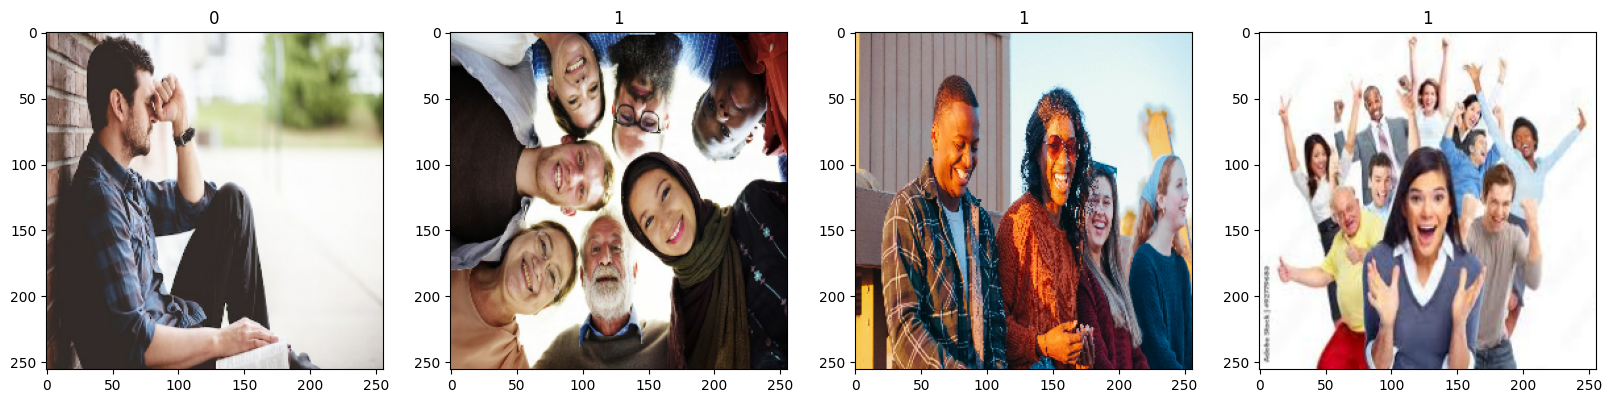

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# **Escalamos las imágenes**

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()


(array([[[[1.17647061e-02, 3.53400744e-02, 4.71966900e-02],
          [1.56862754e-02, 6.27451017e-02, 7.84313753e-02],
          [4.81924005e-02, 2.51577824e-01, 3.15916061e-01],
          ...,
          [1.87775731e-01, 9.29181993e-01, 9.92156863e-01],
          [1.88235298e-01, 9.33333337e-01, 9.88235295e-01],
          [1.84313729e-01, 9.37254906e-01, 9.92156863e-01]],
 
         [[1.96997542e-02, 7.45557621e-02, 7.86151960e-02],
          [4.31372561e-02, 1.76470593e-01, 2.19607845e-01],
          [1.07950367e-01, 5.12300849e-01, 6.40778184e-01],
          ...,
          [1.84083953e-01, 9.29181993e-01, 9.92156863e-01],
          [1.84313729e-01, 9.29411769e-01, 9.92156863e-01],
          [1.84313729e-01, 9.33333337e-01, 9.92156863e-01]],
 
         [[8.63204673e-02, 3.96446079e-01, 4.98452812e-01],
          [1.13725491e-01, 5.56862772e-01, 6.94117665e-01],
          [1.29871324e-01, 6.49126828e-01, 8.14522088e-01],
          ...,
          [1.84313729e-01, 9.17647064e-01, 9.8823

# **Dividimos las imágenes**

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

4

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# **Creamos el modelo de aprendizaje**

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

# **Entrenamos la red**

In [ ]:
logdir='logs'


In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
4/4 [==============================] - 15s 3s/step - loss: 1.6411 - accuracy: 0.5312 - val_loss: 1.5902 - val_accuracy: 0.3750
Epoch 2/20
4/4 [==============================] - 12s 3s/step - loss: 0.9185 - accuracy: 0.4922 - val_loss: 0.6182 - val_accuracy: 0.6250
Epoch 3/20
4/4 [==============================] - 12s 2s/step - loss: 0.6529 - accuracy: 0.5859 - val_loss: 0.6160 - val_accuracy: 0.5938
Epoch 4/20
4/4 [==============================] - 14s 3s/step - loss: 0.6373 - accuracy: 0.6328 - val_loss: 0.5970 - val_accuracy: 0.6562
Epoch 5/20
4/4 [==============================] - 12s 3s/step - loss: 0.5907 - accuracy: 0.6562 - val_loss: 0.5474 - val_accuracy: 0.8125
Epoch 6/20
4/4 [==============================] - 13s 3s/step - loss: 0.5247 - accuracy: 0.7188 - val_loss: 0.4801 - val_accuracy: 0.8750
Epoch 7/20
4/4 [==============================] - 12s 3s/step - loss: 0.4548 - accuracy: 0.8359 - val_loss: 0.4106 - val_accuracy: 0.7188
Epoch 8/20
4/4 [==================

# **Gráficamos los resultados**

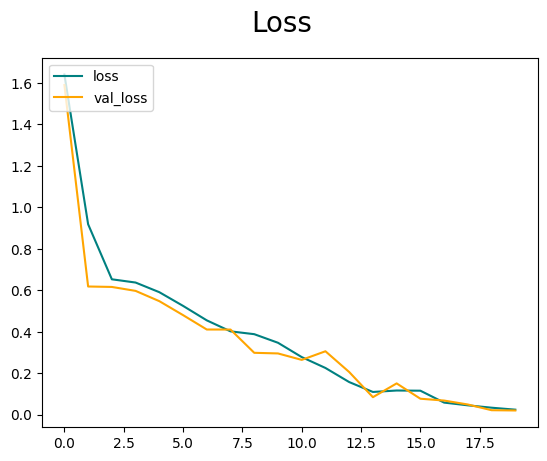

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

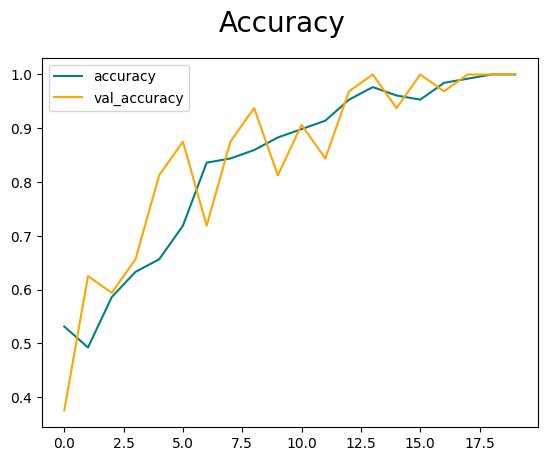

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# **Evaluación de la red**

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(f'Precision: {pre.result()}, Recall: {re.result()}, Accuracy: {acc.result()}')


Precision: 0.0, Recall: 0.0, Accuracy: 0.0


# **Test final**

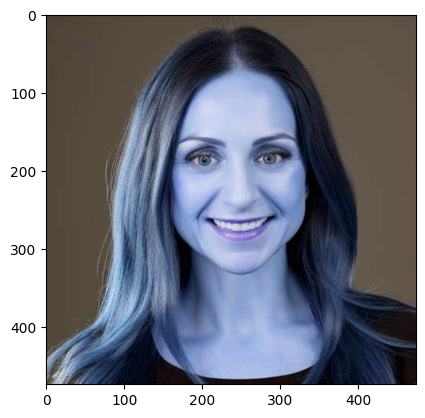

In [ ]:
img = cv2.imread('happytest.jpg')
plt.imshow(img)
plt.show()

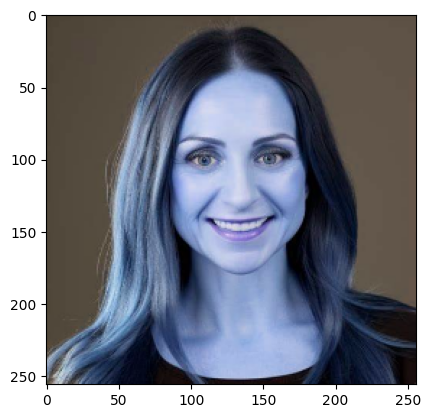

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 136ms/step


In [ ]:
yhat

array([[0.08631032]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# **Guardamos los resultados**

In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))


In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 108ms/step


array([[0.08631032]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
